# <span style="text-decoration:underline; text-decoration-color:orange"> PEP 695 – Type Parameter Syntax </span>
</br>
<span style="color: white">aaaaaaa</span></br>
</br>

#### <span style="text-decoration:underline; text-decoration-color:orange;"> Mercredi 25 Octobre 2023 </span>


# Motivations


<ul style="list-style: none;">
    <li>Le typage générique est utilisé dans plusieurs langages.</li>
    <li></li>
    <li>Il permet de résoudre beaucoup de problèmes d'Abstraction.</li>
    <li></li>
    <li>C'est un sujet qui nous plait beaucoup.</li>
</ul>


# Sommaire

* **Exemples Introductifs**
    * [Généricité Simple](#example1)
    * [Généricité Multiple](#example2)
    * [En Résumé](#resume)
* [Chronologie d'Apparition des Types Génériques](#chronologie)
* [Généricité Simple En python... jusqu'alors](#python1)
* [Généricité en Python 3.12](#python3.12)
* [Sources](#sources)

## Généricité Simple <a class="anchor" id="example1"></a>

<div style="justify-content: center; width: 610px; margin-left: 5px;">
<img style="width:100%; border: 3px solid #08182F; border-radius: 80px" src="pictures/misc1.png" alt="Image d'Introduction"/>
</div>

### Généricité Simple (1/5)


```ts
/**
 * Types for extremely complex objects.
 */
// List of available courses
type Classes = "Advanced English" | "Maths" | "Physics" | "Computer Science" | "Baby-Foot";

// A student in the University
type Student = {
  administrationId: string;
  lastName: string;
  firstName: string;
  attendedClasses: Array<Classes>;
};
```

### Généricité Simple (2/5)

```ts
class University {
  name: string;
  students: Array<Student>;

  constructor(name: string) {
    this.name = name;
    this.students = new Array<Student>();
  }

  addStudent(student: Student): void {
    this.students = [...this.students, student];
  }

  removeStudent(administrationId: string): void {
    this.students = this.students.filter((student) => {
      return student.administrationId === administrationId;
    });
  }

  getStudent(administrationId: string): Student | undefined {
    return this.students.find((student) => {
      return student.administrationId === administrationId;
    });
  }
}
```

### Généricité Simple (3/5)

```ts
type DoctoralStudent = {
  administrationId: string;
  lastName: string;
  firstName: string;
  classesGiven: Array<Classes>;
  salary: number;
};
```

**Réflexion pertinente** : Que ce passe-t-il si on ajoute un doctorant à l'université ?

### Généricité Simple (4/5)


**Dans les faits** :

```ts

const robert: Student = {
  administrationId: "452115r",
  firstName: "Robert",
  lastName: "Robert",
  attendedClasses: ["Computer Science", "Baby-Foot"],
};

const nathan: DoctoralStudent = {
  administrationId: "559151d",
  firstName: "D",
  lastName: "Nathan",
  classesGiven: ["Baby-Foot"],
  salary: 2100,
};
const university = new University("Web Master"); // what an University !
university.addStudent(robert) // OK
university.addStudent(nathan) // KO : Property 'attendedClasses' is missing in type 'DoctoralStudent' but required in type 'Student'
```

### Généricité Simple (5/5)

**Problème** : Comment pouvoir ajouter un _DoctoralStudent_ dans un Objet de type _University_ ?


**Solution naive** : Rendre le type _student_ plus "englobant" : 

```ts
// A student in the University
type Student = {
    administrationId: string;
    lastName: string;
    firstName: string;
    attendedClasses: Array<Classes>;
};

type DoctoralStudent = {
  administrationId: string;
  lastName: string;
  firstName: string;
  classesGiven: Array<Classes>;
  salary: number;
};
```

```ts
type Academics = Student | DoctoralStudent
```

### Généricité Simple - Premiere Approche (1/3) <a class="anchor" id="example1-solution1"></a>

```ts
class University {
  name: string;
  academics: Array<Academics>;

  constructor(name: string) {
    this.name = name;
    this.academics = new Array<Academics>();
  }
 
  addAcademic(academic: Academics): void {
    this.academics = [...this.academics, academic];
  }
 
  removeAcademic(administrationId: string): void {
    this.academics = this.academics.filter((academic) => {
      return academic.administrationId === administrationId;
    });
  }

  getAcademic(administrationId: string): Academics | undefined {
    return this.academics.find((academic) => {
      return academic.administrationId === administrationId;
    });
  }}
```

### Généricité Simple - Premiere Approche (2/3)

**Et donc** : Est ce que ça va marcher ?


**Dans les faits** \#2:

```ts
const university = new University("Web Master reborn"); // instantiation of a new university
university.addAcademic(robert); // OK
university.addAcademic(nathan); // OK
```

### Généricité Simple - Premiere Approche (3/3)
<ul style="list-style: none;">
    <li><span style="color: green">+ On répond au besoin</span></li>
    <li><span style="color: red">- A chaque nouveaux types géré, il faut modifier le type "générique" de notre université</span></li>
    <li><span style="color: red">- On manipule des unions d'objets complexes</span></li>
</ul>

### Généricité Simple - Seconde Approche (1/5) <a class="anchor" id="example1-solution2"></a>

**Solution Partielle** On utilise un type générique pour notre classe d'Université :

```ts
class University<T> {
    name: string;
    academics: Array<T>;

    constructor(name: string){
        this.name = name
        this.academics = new Array<T>;
    }

    addAcademic(academic: T): void{
        this.academics = [...this.academics, academic]
    }
    (...)
```

**Interrogation** : Pourquoi est-ce une solution partielle ?

### Généricité Simple - Seconde Approche (2/5) <a class="anchor" id="example1-solution2"></a>

**Solution Partielle** On utilise un type générique pour notre classe d'Université :

```ts
class University<T> {
    name: string;
    academics: Array<T>;

    constructor(name: string){
        this.name = name
        this.academics = new Array<T>;
    }

    addAcademic(academic: T): void{
        this.academics = [...this.academics, academic]
    }

 removeAcademic(administrationId: string): void {
        this.academics = this.academics.filter((academic) => {return academic.administrationId === administrationId})
        //Property 'administrationId' does not exist on type 'T' !
    }

    getAcademic(administrationId: string): T | undefined {
        return this.academics.find((academic) => {return academic.administrationId === administrationId})
        //Property 'administrationId' does not exist on type 'T' !
    }
}
```

### Généricité Simple - Seconde Approche (3/5)


**Solution complète** : On part d'un type _Academics_ le plus épuré possible : 

```ts
type Academics = {
    administrationId: string;
    lastName: string;
    firstName: string;
};
```

### Généricité Simple - Seconde Approche (4/5)

```ts
class University<T extends Academics> {
    name: string;
    academics: Array<T>;

    constructor(name: string){
        this.name = name
        this.academics = new Array<T>;
    }

    addAcademic(academic: T): void{
        this.academics = [...this.academics, academic]
    }
   
    removeAcademic(administrationId: string): void {
        this.academics = this.academics.filter((academic) => {return academic.administrationId === administrationId})
        //OK
    }

    getAcademic(administrationId: string): T | undefined {
        return this.academics.find((academic) => {return academic.administrationId === administrationId})//OK
    }
}
```

### Généricité Simple - Seconde Approche (5/5)

```ts
const university = new University<Academics>("Web Master apotheosis"); // instantiation of a new university
university.addAcademic(robert) // OK
university.addAcademic(nathan) // OK, this is fine
```


### Généricité Simple - Bilan <a class="anchor" id="example1-bilan"></a>


Avec la seconde approche :
<ul style="list-style: none;">
    <li><span style="color: green">+ On répond au besoin</span></li>
    <li><span style="color: green">+ La gestion des types concernés est faite à un seul endroit</span></li>
    <li><span style="color: green">+ A chaque nouveaux types géré, rien ne change dans la structure de la classe</span></li>
    <li><span style="color: green">+ Contraintes explicite sur le type attendu à l'instanciation d'une nouvelle université</span></li>
</ul>


## Généricité Multiple <a class="anchor" id="example2"></a>

<div style="justify-content: center; width: 610px; margin-left: 10px;">
<img style="width:100%; border: 3px solid #08182F; border-radius: 50px" src="pictures/mfr.png" alt="Image sur le typage generique"/>
</div>


### Généricité Multiple (1/6)

On se donne la définition d'un dictionaire suivante :

```ts
interface Dict<T> {
  [k: string]: T;
}
```


### Généricité Multiple (2/6)

```ts
function mapDict<T, S>(
  inputDict: Dict<T>,
  mapFunction: (original: T, key: string) => S
): Dict<S> {
  const outDict: Dict<S> = {};
  for (let k of Object.keys(inputDict)) {
    const thisVal = inputDict[k];
    outDict[k] = mapFunction(thisVal, k);
  }
  return outDict;
}
```

### Généricité Multiple (3/6)

```ts
function filterDict<T>(
  inputDict: Dict<T>,
  filterFunction: (value: T, key: string) => boolean
): Dict<T> {
  const outDict: Dict<T> = {};
  for (let k of Object.keys(inputDict)) {
    const thisVal = inputDict[k];
    if (filterFunction(thisVal, k)) outDict[k] = thisVal;
  }
  return outDict;
}
```

### Généricité Multiple (4/6)

```ts
function reduceDict<T, S>(
  inputDict: Dict<T>,
  reducerFunction: (currentVal: S, dictItem: T, key: string) => S,
  initialValue: S
): S {
  let value = initialValue;
  for (let k of Object.keys(inputDict)) {
    const thisVal = inputDict[k];
    value = reducerFunction(value, thisVal, k);
  }
  return value;
}
```

### Généricité Multiple  (5/6)

Testons tout cela : 

```ts
const fruits = {
  apple: { color: "red", mass: 100 },
  grape: { color: "red", mass: 5 },
  banana: { color: "yellow", mass: 183 },
  lemon: { color: "yellow", mass: 80 },
  pear: { color: "green", mass: 178 },
  orange: { color: "orange", mass: 262 },
  raspberry: { color: "red", mass: 4 },
  cherry: { color: "red", mass: 5 },
};
```

### Généricité Multiple  (6/6)

```ts
// fruits with kg mass :
const fruitsWithKgMass = mapDict(fruits, (fruit, name) => ({
  ...fruit,
  kg: 0.001 * fruit.mass,
  name,
}));

// only red fruits
const redFruits = filterDict(fruits, (fruit) => fruit.color === "red");

// If we had one of each fruit, how much would the total mass be ?
const oneOfEachFruitMass = reduceDict(
  fruits,
  (currentMass, fruit) => currentMass + fruit.mass,
  0
);
```

<style>
blockquote{
  padding: .75em .5em .75em 1em;
  background: white;
  border-left: 0.5em solid rgb(255,128,0);
  color: rgb(50, 50,50)
}

blockquote::before {
  display: block;
  height: 0;
  content: "“";
  margin-left: -.95em;
  font: italic 400%/1 Open Serif,Georgia,"Times New Roman", serif;
  color: rgb(20, 50, 60);
}

/* for nested paragraphs in block quotes */
blockquote p {
  display: inline;
}

blockquote blockquote {
  padding: .75em .5em .75em 1em;
  background: white;
  border-left: 0.5em solid rgb(255,178,102);
  color: rgb(50, 50,50)
}

blockquote blockquote::before {
  display: block;
  height: 0;
  content: "“";
  margin-left: -.95em;
  font: italic 400%/1 Open Serif,Georgia,"Times New Roman", serif;
  color: transparent;
}
</style>

## En Résumé <a class="anchor" id="resume"></a>

> Un type générique s’adapte pour exécuter la même fonction sur différents types de données. Avec une classe ou procédure générique, il n'y a pas besoin de définir une version distincte pour chaque types de données liés à notre classe ou procédure.

> On peut contraindre ces types générique par une borne (notre extends en Typescript), dans d'autres langages, on peut également contraindre une borne inférieure ou supérieure (avec les mots cléfs _super_ et _extends_ en JAVA par exemple).

> On peut utiliser plusieurs types génériques dans la même définition de classes, méthodes, ...

Bornes inf et sup :

Borne sup : On étend notre objet -> we can GET elements out of the structure, but we CAN NOT PUT elements into it.

Borne inf : On à au plus notre object, ou alors un de ces sous types -> we can PUT elements into the structure, but we CAN NOT GET elements out of it.

-> C'est plus sûr pour le compilateur.



On pourrait comparer cet élément de programmation à un tournevis à têtes interchangeables :

<div style="justify-content: center; width: 610px; margin-left: 40px;">
<img style="width:100%; border: 3px solid #08182F; border-radius: 50px" src="pictures/type_g%C3%A9n%C3%A9rique1.png" alt="Image sur le typage generique"/>
</div>

## Chronologie d'Apparition des Types Génériques <a class="anchor" id="example"></a>

<div style="justify-content: center; width: 610px; margin-left: 100px;">
<img style="width:100%; border: 3px solid #08182F; border-radius: 80px" src="pictures/misc3.png" alt="Image apparition types generiques"/>
</div>

<span style="justify-content: right; font-size: smaller; margin-left: 150px;"><i>Jerf el Ahmar - Syrie</i> <a href="https://journals.openedition.org/tc/5333">(Néolithique précéramique, 9500 à 8500 av. notre ère)</a></span>

2004 : JDK 1.5, appelé Java 5.

12 août 2011 -> ajout des templates -> c++

rust -> 2015 pour la release 1.1.0

Typescript -> 22 February 2016

    PEP 484 – Type Hints -> python -> 29-Sep-2014 mais il faudra attendre PEP 560 – Core support for typing module and generic types en 03-Sep-2017 pour un meilleur support, ...et encore + expliquer ce qu'il manque + exemple université + mapper en python + transition.


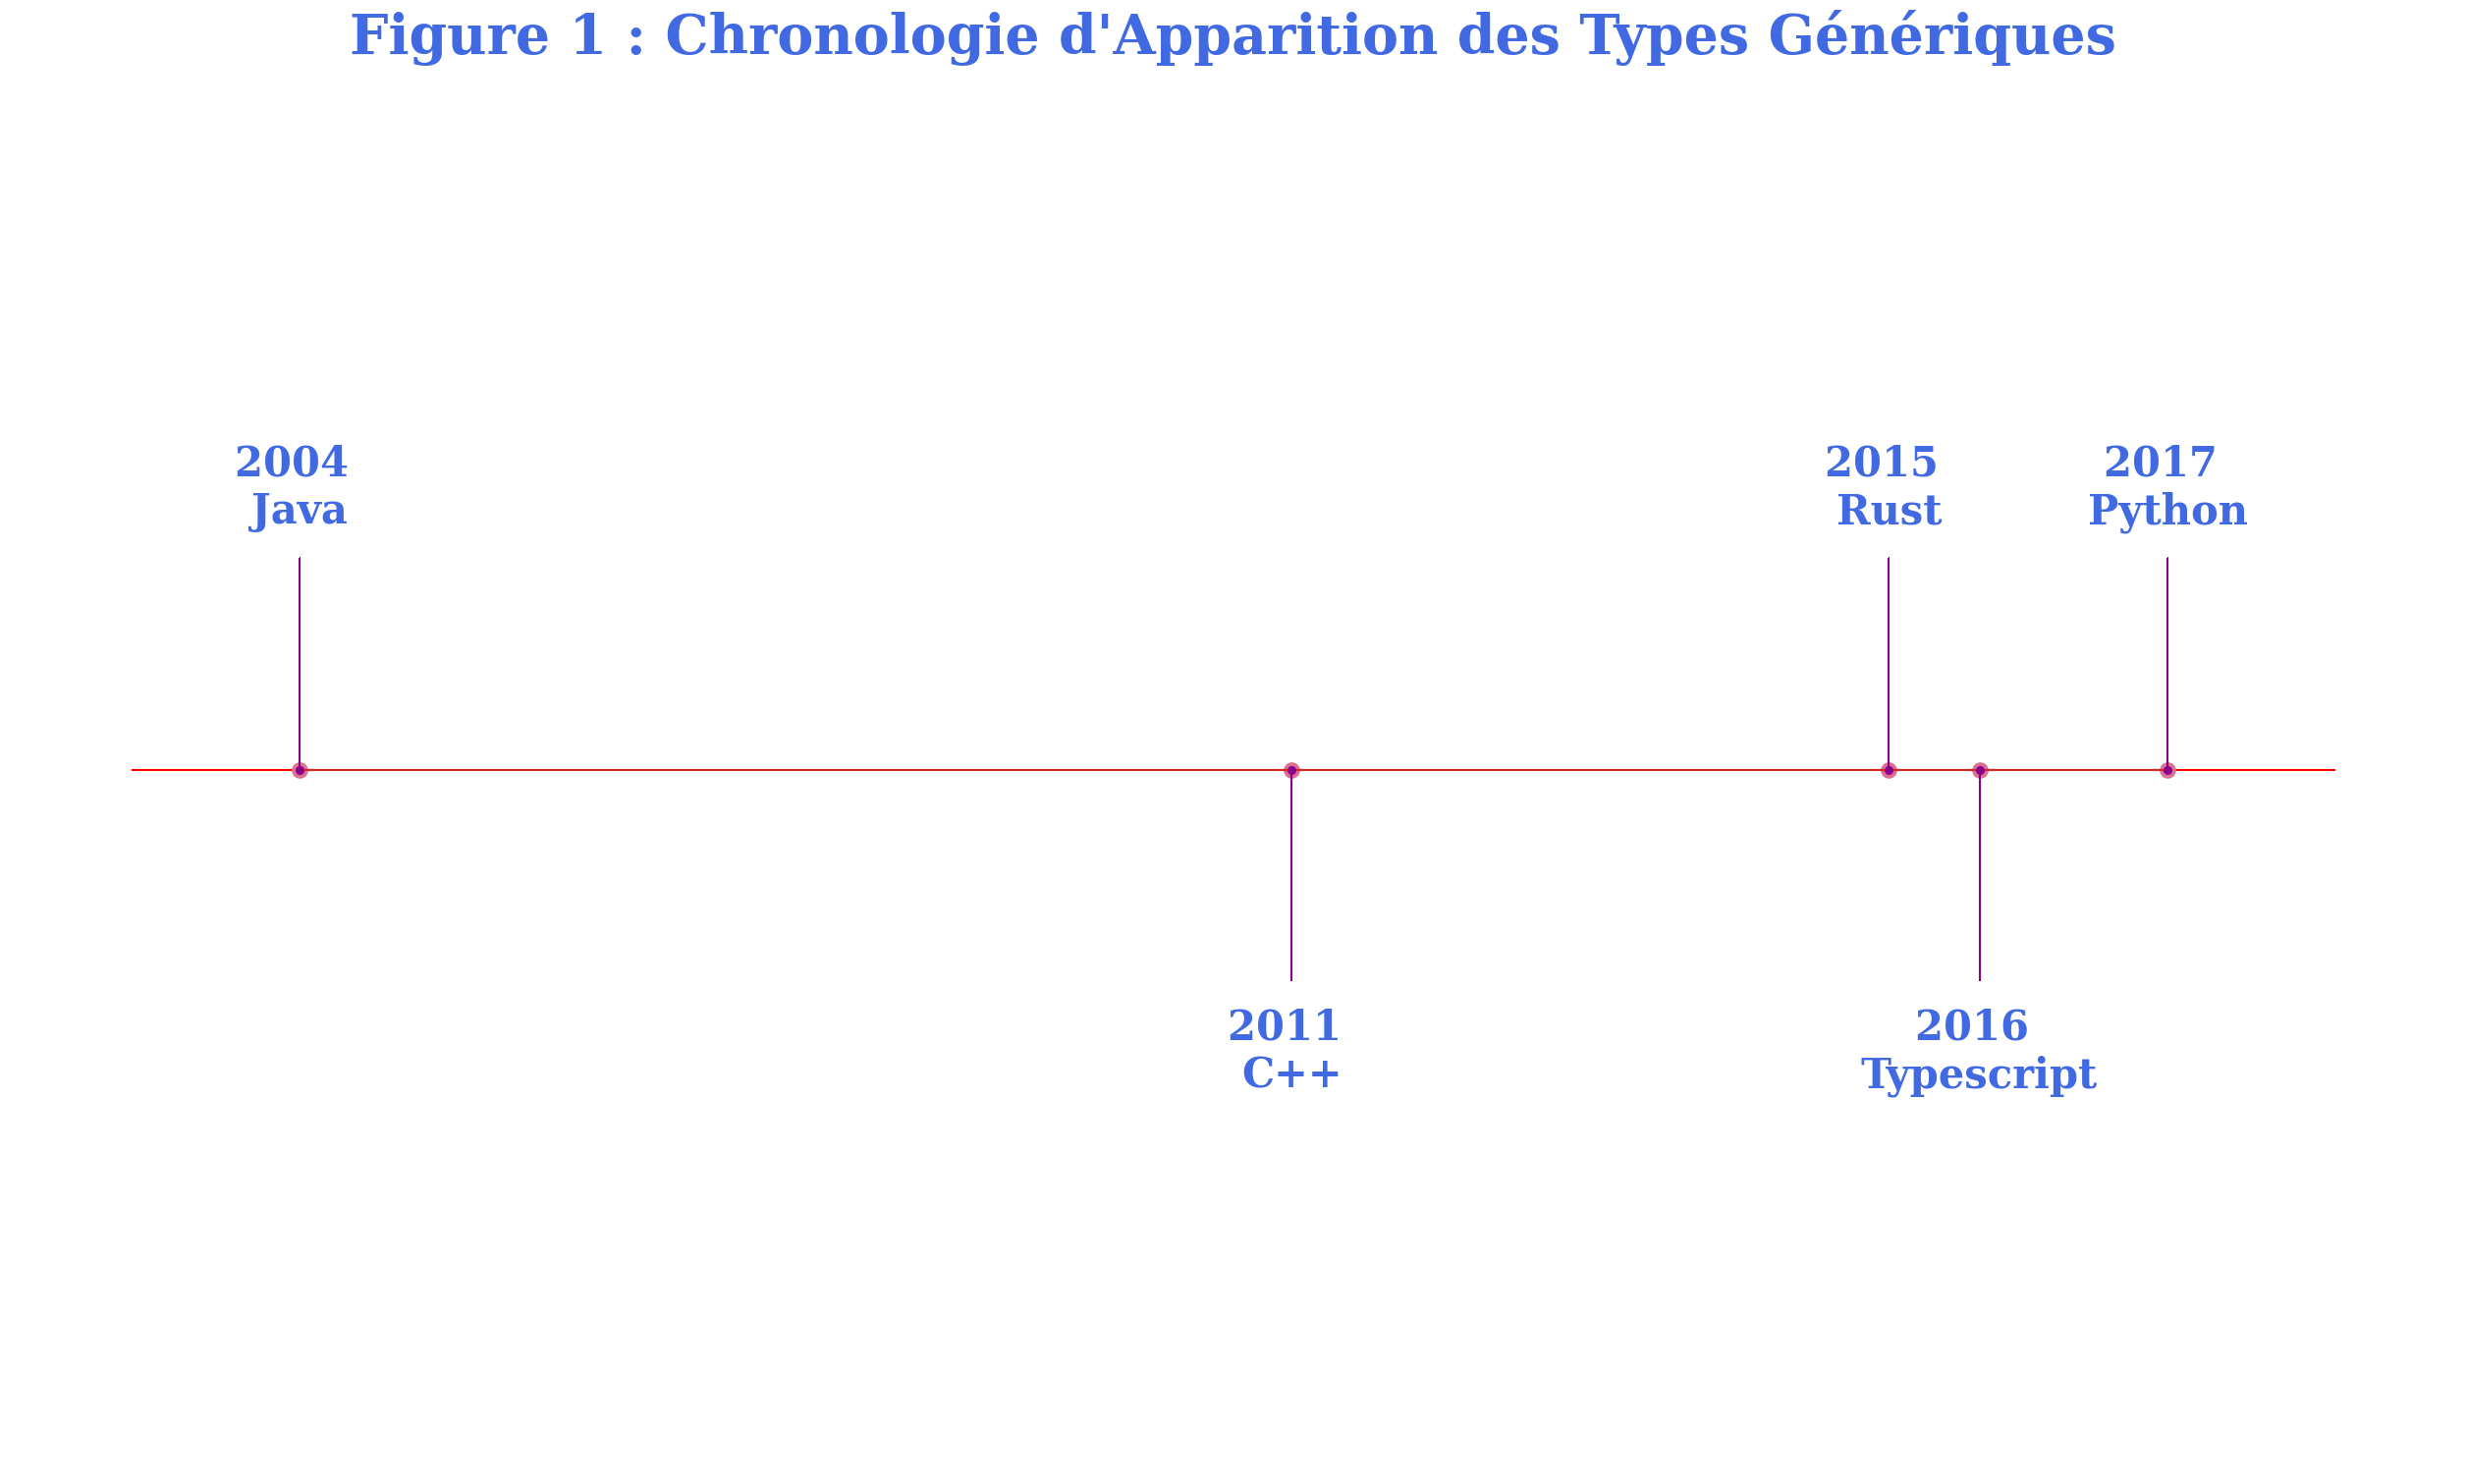

In [11]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
 
%matplotlib inline

dates = [date(2004, 9, 30), date(2011, 8, 12), date(2015, 9, 29), date(2016, 5, 15), date(2017, 9, 3)]
min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)
 
labels = ['Java', 'C++', 'Rust','Typescript', 'Python']
# labels with associated dates
labels = ['{0:%Y} \n{1}'.format(d, l) for l, d in zip (labels, dates)] #  default date format is '{0:%d %b %Y}:\n{1}'

fig, ax = plt.subplots(figsize=(25, 15), constrained_layout=True)
_ = ax.set_ylim(-1, 1)
_ = ax.set_xlim(min_date , max_date)
_ = ax.axhline(0, xmin=0.05, xmax=0.95, c='red', zorder=1)
 
_ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='palevioletred', zorder=2)
_ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)

label_offsets = np.zeros(len(dates))

label_offsets[::2] = 0.35
label_offsets[1::2] = -0.45
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=30)

stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3   
markerline, stemline, baseline = ax.stem(dates, stems)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title("Figure 1 : Chronologie d'Apparition des Types Génériques", fontweight="bold", fontfamily='serif', fontsize=40, 
                 color='royalblue')


## Généricité En python... jusqu'alors <a class="anchor" id="python1"></a>

<div style="justify-content: center; width: 610px; margin-left: 10px;">
<img style="width:100%; border: 3px solid #08182F; border-radius: 80px" src="pictures/misc2.png" alt="Image python 3.11"/>
</div>

## Généricité En python... jusqu'alors (1/4)

Definition de nos types :

```python

from dataclasses import dataclass
from typing import Generic, TypeVar


@dataclass(frozen=True)
class Academics:
    administration_id: str
    last_name: str
    first_name: str
        

GenericAcademics = TypeVar("GenericAcademics", bound=Academics)
```

```python
class University(Generic[GenericAcademics]):
    name: str
    academics: list[GenericAcademics]

    def __init__(self, name: str) -> None:
        super().__init__()
        self.name = name
        self.academics = []

    def add_academic(self, academic: GenericAcademics) -> None:
        self.academics.append(academic)

    def removeAcademic(self, administration_id: str) -> None:
        removed_student = next(
            filter(
                lambda academic: academic.administration_id == administration_id,
                self.academics,
            ),
            None,
        )
        if removed_student:
            self.academics.remove(removed_student)

     # (...)
 ```

## Généricité En python... jusqu'alors (2/3)

```python
from typing import TypeVar, TypeAlias, Dict, Callable

Dict_like_content = TypeVar("Dict_like_content")
Dict_like: TypeAlias = Dict[str, Dict_like_content]

T = TypeVar("T")
S = TypeVar("S")

def reduce_dict(
    input_dict: Dict_like[T],
    reducer_function: Callable[[S, T, str], S],
    initial_value: S,
) -> S:
    current_value = initial_value
    for key_, value_ in input_dict.items():
        current_value = reducer_function(current_value, value_, key_)
    return current_value
```

<style>
    .outer {
      margin: 0 auto;
    }
    .inner {
      margin-left: 20px;
    }
    td:first-child {
        border-right: 1px solid orange;
        border-top-left-radius: 15px;
        border-bottom-left-radius: 15px;
    }
    img {
        object-fit:fill;
    }
    td {
        background-color: #08182F;
        border: 1px solid orange;
    }
    td:last-child {
        border-top-right-radius: 15px;
        border-bottom-right-radius: 15px;
    }
    th {
        border-bottom: 0;
    }
    </style>
<table>
    <thead>
    <tr>
        <th scope="col">En Python</th>
        <th scope="col">En Typescript </th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td><img src="pictures/code1.png" alt="code en Python"\></td>
<td><img src="pictures/code2.png" alt="code en Typescript"\></td>
    </tr>
    </tbody>
</table>

## Généricité En python... jusqu'alors (3/3)

Ce que on peut dire de ces codes python :
<ul style="list-style: none;">
    <li><span style="color: green">+ On répond au besoin</span></li>  
    <li><span style="color: green">+ La gestion des types concernés est faite à un seul endroit</span></li> 
    <li><span style="color: green">+ A chaque nouveau type géré, rien ne change dans la structure de la classe</span></li>
    <li><span style="color: red">+ Impossible d'expliciter des contraintes sur le type attendu à l'instanciation d'une nouvelle classe </span></li> 
    <li><span style="color: red">+ Syntaxe un peu lourde et pas forcément intuitive </span></li> 
</ul>

## Généricité En Python 3.12 <a class="anchor" id="python3.12"></a>

## Fini les imports from typing

```python
from typing import Generic, TypeVar

_T_co = TypeVar("_T_co", covariant=True, bound=str)

class ClassA(Generic[_T_co]):
    def method1(self) -> _T_co:
        ...
```

## Fini les imports from typing
```python
class ClassA[T: str]:
    def method1(self) -> T:
        ...
        
def func[T](a: T, b: T) -> T:
    ...
```

## Fini les imports from typing
```python
from typing import TypeAlias

_T = TypeVar("_T")

ListOrSet: TypeAlias = list[_T] | set[_T]

    
type ListOrSet[T] = list[T] | set[T]
```

# TupleVar et TypeVarTuple

- **TypeVarTuple** : Permet de travailler avec des tuples de longueur et de contenu variables, utile lorsque la structure du tuple est inconnue à l'avance.
```python
        type LabeledTuple[*Ts] = tuple[str, *Ts]
```

- **TypeVar avec Contrainte** : Vous permet d'imposer des restrictions spécifiques sur les types de paramètres. Par exemple, vous pouvez exiger que les éléments d'une séquence soient tous hashables.
```python
        type HashableSequence[T: Hashable] = Sequence[T]
```

- **TypeVar avec Contraintes** : Pour définir des contraintes plus complexes, permettant de limiter les types autorisés à une combinaison précise, tels que les entiers ou les chaînes de caractères.
```python
        type IntOrStrSequence[T: (int, str)] = Sequence[T]
```

## Parameter Specification Variables

- Utilisées dans les listes de paramètres de type en utilisant **:

  ```python
  type IntFunc[**P] = Callable[P, int]
  ```

- Utiles pour transmettre les types de paramètres d'un callable à un autre, courant dans les fonctions d'ordre supérieur et les décorateurs.

- Valides en tant que premier argument de "Callable".



- Élimine le besoin d'utiliser TypeVar avec "Callable[..., Any]", résolvant des problèmes de typage:
  1. Le vérificateur de types ne peut pas vérifier le type de la fonction interne car *args et **kwargs doivent être typés "Any".
  2. "cast()" peut être nécessaire dans le corps du décorateur "add_logging" lors du retour de la fonction interne, ou il faut dire au vérificateur de types statiques d'ignorer le "return inner".

## Parameter Specification Variables
- Exemple : un décorateur "add_logging" ajoute de la journalisation aux fonctions. Les variables de spécification de paramètres assurent que les types de paramètres sont interdépendants.

  ```python
  from typing import Callable
  import logging

  def add_logging[T, **P](f: Callable[P, T]) -> Callable[P, T]:
      '''Un décorateur de type sûr pour ajouter une journalisation à une fonction.'''
      def inner(*args: P.args, **kwargs: P.kwargs) -> T:
          logging.info(f'{f.__name__} a été appelé')
          return f(*args, **kwargs)
      return inner

  @add_logging
  def add_two(x: float, y: float) -> float:
      '''Ajoute deux nombres ensemble.'''
      return x + y
  ```

## Parameter Specification Variables
- Élimine le besoin d'utiliser TypeVar avec "Callable[..., Any]", résolvant des problèmes de typage:
  1. Le vérificateur de types ne peut pas vérifier le type de la fonction interne car *args et **kwargs doivent être typés "Any".
  2. "cast()" peut être nécessaire dans le corps du décorateur "add_logging" lors du retour de la fonction interne, ou il faut dire au vérificateur de types statiques d'ignorer le "return inner".

## Les exemple 3.11 en 3.12
```python
from typing import TypeVar, TypeAlias, Dict, Callable

Dict_like_content = TypeVar("Dict_like_content")
Dict_like: TypeAlias = Dict[str, Dict_like_content]

T = TypeVar("T")
S = TypeVar("S")

def reduce_dict(
    input_dict: Dict_like[T],
    reducer_function: Callable[[S, T, str], S],
    initial_value: S,
) -> S:
    current_value = initial_value
    for key_, value_ in input_dict.items():
        current_value = reducer_function(current_value, value_, key_)
    return current_value
```

## Les exemple 3.11 en 3.12
```python
type DictLike[T] = Dict[str, T]

def reduce_dict[T, S](
    input_dict: DictLike[T],
    reducer_function: Callable[[S, T, str], S],
    initial_value: S,
) -> S:
    current_value = initial_value
    for key_, value_ in input_dict.items():
        current_value = reducer_function(current_value, value_, key_)
    return current_value
```

## Les exemple 3.11 en 3.12
```python
class Vec2[T]:
    x: T
    y: T

    def __init__(self, x: T, y: T):
        self.x = x
        self.y = y

    def dot(self) -> T:
        return sqrt(self.x * self.x + self.y * self.y)

    def __add__(self, o: Self) -> Self:
        return Vec2(self.x + o.x, self.y + o.y)
    
    def __str__(self):
        return f"Vec2({self.x}, {self.y})"
```

## Les exemple 3.11 en 3.12
```python
dict_1: DictLike[Vec2[int]] = {"a": Vec2(1, 2), "b": Vec2(2, 3)}

def sum_result(accumulator: Vec2, value: Vec2, key: str) -> Vec2:
    return accumulator + value

def dot_result(accumulator: int, value: Vec2, key: str) -> int:
    return accumulator + value.dot()

print(reduce_dict(dict_1, sum_result, Vec2(0, 0)))
# Vec2(3, 5)
print(reduce_dict(dict_1, dot_result, 0))
# 5.841619252963779
```

# Sources <a class="anchor" id="sources"></a>


Release des versions des languages qui introduisent les types génériques :
 + [Rust](https://github.com/rust-lang/rust/blob/master/RELEASES.md)
 + [TypeScript](https://en.wikipedia.org/wiki/TypeScript#Release_history)
 + [C++](https://fr.wikipedia.org/wiki/C%2B%2B#Fonctionnalit%C3%A9s_introduites)
 + [Java](https://koor.fr/Java/Tutorial/java_generics_introduction.wp)
 

Pour aller plus loin sur les types génériques (sur JAVA):
 + [Generics & Variance](https://medium.com/androidiots/generics-variance-2def0411ce1b)


Les autres PEP Python évoquées dans la présentation:
 + [PEP 484 – Type Hints](https://peps.python.org/pep-0484/)
 + [PEP 560 – Core support for typing module and generic types](https://peps.python.org/pep-0560/)
 + [PEP 585 – Type Hinting Generics In Standard Collections](https://peps.python.org/pep-0585/)
 + [PEP 646 – Variadic Generics](https://peps.python.org/pep-0646/)
